# Decision Trees und Random Forests

## Quelle der Daten

https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data (zuletzt aufgerufen: 01/2024)

https://www.framinghamheartstudy.org/ (zuletzt aufgerufen: 01/2024)

## Installation der Bibliotheken

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

## Einlesen der Daten

In [2]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\FraminghamHeartStudy.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,ZehnJahreKHK,Geschlecht,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker
1,0,M,38,1,20.0,0.0,0,0,0,113.0,120,84,30.0,78.0,85.0
2,0,M,47,1,20.0,0.0,0,0,0,119.0,117,79,26.0,75.0,78.0
3,1,M,66,0,0.0,0.0,0,1,0,124.0,138,91,32.0,75.0,96.0
6,1,M,51,1,7.0,0.0,0,1,0,133.0,138,78,17.0,80.0,65.0
7,0,W,36,1,3.0,0.0,0,0,0,135.0,108,74,23.0,73.0,75.0


In [3]:
data_new = pd.get_dummies(data, columns = ["Geschlecht"])

data_new.head()

,ZehnJahreKHK,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker,Geschlecht_M,Geschlecht_W
1,0,38,1,20.0,0.0,0,0,0,113.0,120,84,30.0,78.0,85.0,1,0
2,0,47,1,20.0,0.0,0,0,0,119.0,117,79,26.0,75.0,78.0,1,0
3,1,66,0,0.0,0.0,0,1,0,124.0,138,91,32.0,75.0,96.0,1,0
6,1,51,1,7.0,0.0,0,1,0,133.0,138,78,17.0,80.0,65.0,1,0
7,0,36,1,3.0,0.0,0,0,0,135.0,108,74,23.0,73.0,75.0,0,1


<Axes: >

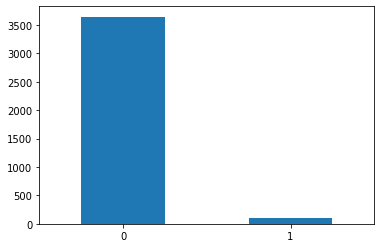

In [4]:
count_diabetes = data_new["Diabetes"].value_counts()

count_diabetes.plot(kind = "bar", rot = 0)

## Aufteilung der Daten und Resampling

In [5]:
x = data_new.iloc[:, [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]]

y = data_new.iloc[:, 7]

In [6]:
x.head()

,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker,Geschlecht_M
1,38,1,20.0,0.0,0,0,113.0,120,84,30.0,78.0,85.0,1
2,47,1,20.0,0.0,0,0,119.0,117,79,26.0,75.0,78.0,1
3,66,0,0.0,0.0,0,1,124.0,138,91,32.0,75.0,96.0,1
6,51,1,7.0,0.0,0,1,133.0,138,78,17.0,80.0,65.0,1
7,36,1,3.0,0.0,0,0,135.0,108,74,23.0,73.0,75.0,0


In [7]:
y.head()

1    0
2    0
3    0
6    0
7    0
Name: Diabetes, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [10]:
sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(y_train_res.value_counts())

0    3096
1    3096
Name: Diabetes, dtype: int64


## Decision-Tree-Modell

In [11]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 2, max_leaf_nodes = None)

dt.fit(x_train_res, y_train_res)

dt.score(x_test, y_test)

0.9413854351687388

[Text(0.5, 0.8333333333333334, 'Blutzucker <= 105.026\nentropy = 1.0\nsamples = 6192\nvalue = [3096, 3096]\nclass = 0'),
 Text(0.25, 0.5, 'Alter <= 46.5\nentropy = 0.668\nsamples = 3615\nvalue = [2984, 631]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.14\nsamples = 1314\nvalue = [1288, 26]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.831\nsamples = 2301\nvalue = [1696, 605]\nclass = 0'),
 Text(0.75, 0.5, 'Blutzucker <= 140.003\nentropy = 0.258\nsamples = 2577\nvalue = [112, 2465]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.537\nsamples = 906\nvalue = [111, 795]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.007\nsamples = 1671\nvalue = [1, 1670]\nclass = 1')]

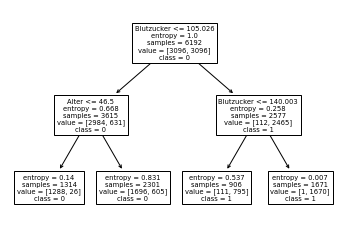

In [12]:
characteristics = ["Alter", "Raucher", "ZigProTag", "BDMedikamente", "Schlaganfall", 
                   "ArtHypertonie", "GesCholesterin", "Systolisch", "Diastolisch", 
                   "BMI", "Herzfrequenz", "Blutzucker", "Geschlecht_M"]

diagnosis = ["0" , "1"]

tree.plot_tree(dt, feature_names = characteristics, class_names = diagnosis)

In [13]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, max_leaf_nodes = None)

dt.fit(x_train_res, y_train_res)

dt.score(x_test, y_test)

0.9342806394316163

## Random-Forest-Modell

In [17]:
rf = RandomForestClassifier(criterion = "gini", max_depth = 5, max_leaf_nodes = None)

rf.fit(x_train_res, y_train_res)

rf.score(x_test, y_test)

0.9378330373001776